In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from ipywidgets import interact

In [43]:
t = np.linspace(0, 2*np.pi, 100)
lags = range(1, 50)

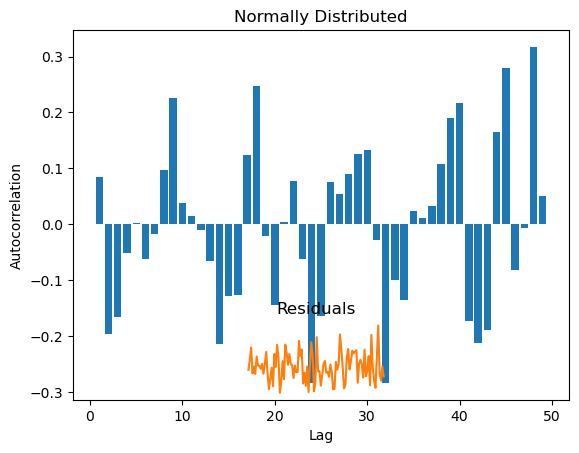

In [44]:
X = np.random.normal(size=100)
plt.bar(lags, [pd.Series(X).autocorr(lag) for lag in lags])
plt.title("Normally Distributed")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
ax = plt.gca().inset_axes([0.49 - 0.15, 0.01, 0.3, 0.2])
ax.axis("off")
ax.set_title("Residuals")
ax.plot(t, X, c="C1")
plt.show()

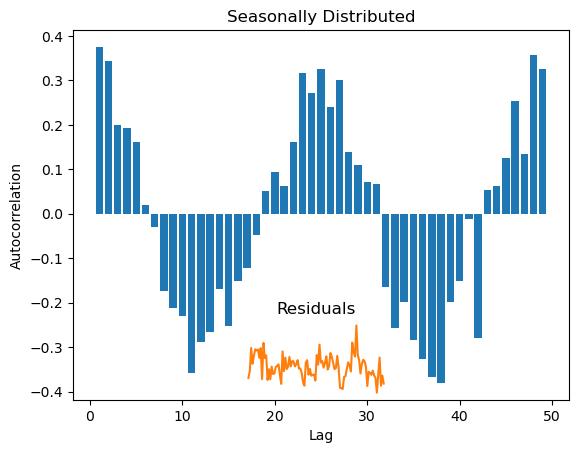

In [72]:
X = np.random.normal(size=100) + np.sin(4*t)
plt.bar(lags, [pd.Series(X).autocorr(lag) for lag in lags])
plt.title("Seasonally Distributed")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
ax = plt.gca().inset_axes([0.49 - 0.15, 0.01, 0.3, 0.2])
ax.axis("off")
ax.set_title("Residuals")
ax.plot(t, X, c="C1")
plt.show()

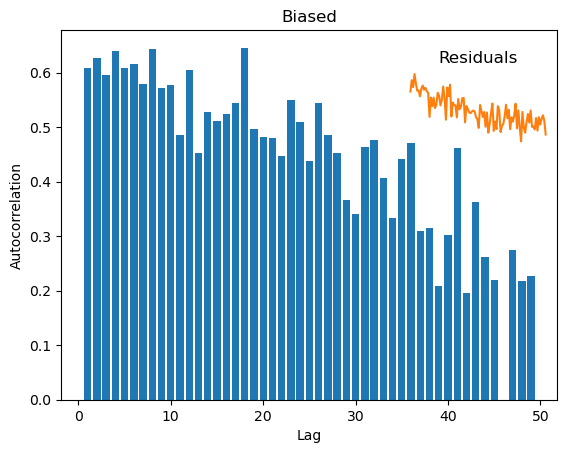

In [88]:
X = 5*np.exp(-0.5*t) + np.random.normal(size=100)
plt.bar(lags, [pd.Series(X).autocorr(lag) for lag in lags])
plt.title("Biased")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
ax = plt.gca().inset_axes([0.99 - 0.3, 0.99 - 0.3, 0.3, 0.2])
ax.axis("off")
ax.set_title("Residuals")
ax.plot(t, X, c="C1")
plt.show()

In [81]:
@interact(residuals=["normal", "seasonal", "bias"])
def plot_ac_resid(residuals="seasonal"):

    if residuals == "normal":
        X = np.random.normal(size=100)
    if residuals == "seasonal":
        X = np.cos(3*t) + 0.1*np.random.normal(size=100)
    if residuals == "bias":
        X = np.exp(-0.2*t) + 0.1*np.random.normal(size=100)
    
    @interact(lag=(0, 50, 1))
    def plot_ac(lag=0):
        
        Y = pd.Series(X).shift(lag)
        
        plt.figure(figsize=(5, 8))
        plt.subplot(311)
        plt.plot(X, label="Original")
        plt.plot(Y, label="Shifted")
        plt.legend()
        plt.title("Residual Timeseries")
        plt.xlabel("Time")
        
        plt.subplot(312)
        sns.regplot(x=X, y=Y, ax=plt.gca(), ci=None, line_kws=dict(color="red"))
        txt = plt.text(np.mean(X), np.mean(Y), f"{pd.Series(X).autocorr(lag):.2f}", ha="center", va="center", color="red")
        txt.set_bbox(dict(facecolor="white", edgecolor="none"))
        plt.title("Original vs. Shifted Scatterplot")
        plt.xlabel("Original")
        plt.ylabel("Shifted")
    
        plt.subplot(313)
        plt.bar(lags, [pd.Series(X).autocorr(lag) for lag in lags], color="gray")
        plt.axvline(lag, color="red")
        txt = plt.text(lag, pd.Series(X).autocorr(lag), f"{pd.Series(X).autocorr(lag):.2f}", ha="center", va="center", color="red")
        txt.set_bbox(dict(facecolor="white", edgecolor="none"))
        plt.title("Autocorrelation Plot")
        plt.xlabel("Lag")
        plt.ylabel("Correlation between\nOrginal and Shifted")

        plt.tight_layout()
        plt.show()

interactive(children=(Dropdown(description='residuals', index=1, options=('normal', 'seasonal', 'bias'), value…